### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score


### Uploading The Dataset




In [5]:
df = pd.read_csv("D:/swoc/thyroid prediction/Thyroid_Diff.csv")

### Analysing The Data & Preprocessing

In [7]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [9]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [10]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

### Exploratory Analysis

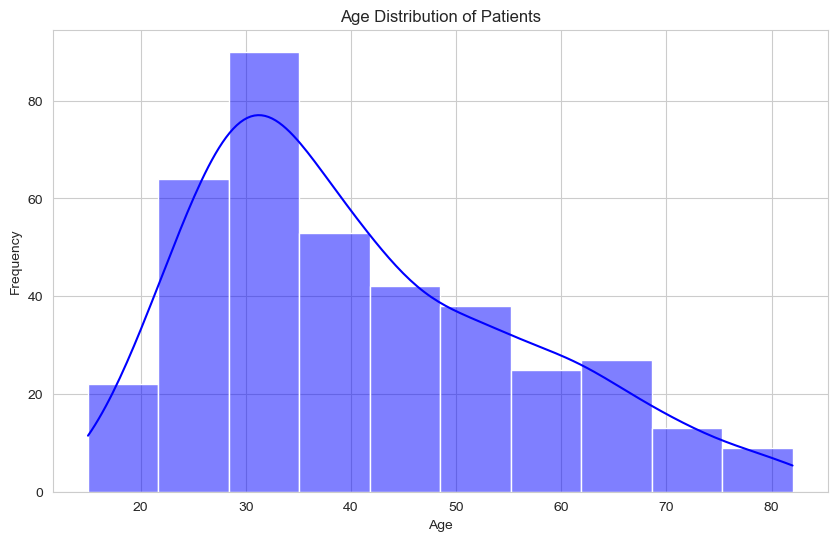

In [12]:
sns.set_style('whitegrid')
#Plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color = 'blue', bins = 10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

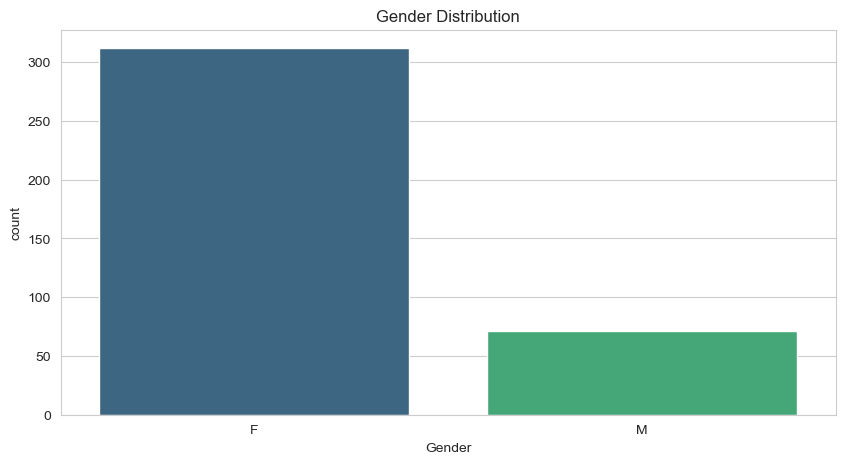

In [13]:
#Gender Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index,hue="Gender",palette="viridis",legend=False)
plt.title('Gender Distribution')
plt.show()

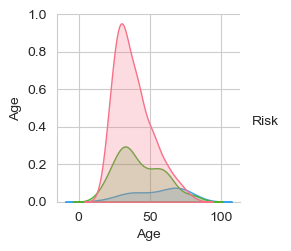

In [14]:
selected_cols = ['Age', 'Risk', 'Stage']  # Example columns
if all(col in df.columns for col in selected_cols):
    sns.pairplot(df[selected_cols], hue='Risk', palette='husl')
    plt.show()

In [15]:
print("Dataset Head:")
print(df.head())

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Specify the columns to encode (update this based on your dataset)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    print(f"Column '{column}' encoded successfully.")

# Display the encoded dataset
print("\nEncoded Dataset Head:")
print(df.head())

Dataset Head:
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1 

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Now you can use correlation_matrix
correlation_with_target = correlation_matrix['Recurred'].sort_values(ascending=False)
print(correlation_with_target)

Recurred                1.000000
Response                0.708957
N                       0.632323
T                       0.556201
Stage                   0.449137
M                       0.354360
Smoking                 0.333243
Gender                  0.328189
Age                     0.258897
Hx Radiothreapy         0.174407
Hx Smoking              0.136073
Thyroid Function        0.067758
Pathology               0.003272
Physical Examination   -0.131801
Adenopathy             -0.182530
Focality               -0.383776
Risk                   -0.733376
Name: Recurred, dtype: float64


### Selecting Target Varible and Feature Selection using SelectKBest

In [18]:
columns_to_include = df.columns[:-1]
# Get the numerical indices of the columns
column_indices = [df.columns.get_loc(col) for col in columns_to_include]
x = df.iloc[:, column_indices].values
y = df.iloc[:, -1].values
print(x)
print(y)

[[27  0  0 ...  0  0  2]
 [34  0  0 ...  0  0  1]
 [30  0  0 ...  0  0  1]
 ...
 [72  1  1 ...  1  4  3]
 [61  1  1 ...  0  3  3]
 [67  1  1 ...  0  3  3]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Spliting The Data

In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Class Imbalance and Scaling the Data

In [22]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SelectkBest - Chi2 , Anova , MutualInfo

In [24]:

from sklearn.feature_selection import SelectKBest , chi2 , mutual_info_classif , f_classif
#here we changed the value of k and parameter(to chi2 ,anova,mutualifo) to record our values
selector = SelectKBest(chi2, k=5)
X_new =selector.fit_transform(x,y)
print(X_new)
classifiers={
'Logistic Regression' : LogisticRegression(max_iter=500,solver='newton-cg'),
'Decision Tree' : DecisionTreeClassifier(),
'Random Forest' : RandomForestClassifier(),
'Support Vector Machine' : SVC(),
}
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    result[name] = accuracy
    print(f'{name} Accuracy : {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred,zero_division=0))
for i in result:
  print(i,result[i]*100)

[[27  0  0  0  2]
 [34  0  0  0  1]
 [30  0  0  0  1]
 ...
 [72  6  2  4  3]
 [61  6  2  3  3]
 [67  6  2  3  3]]
Confusion Matrix for Logistic Regression:
 [[79  4]
 [ 5 27]]
Logistic Regression Accuracy : 92.17%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        83
           1       0.87      0.84      0.86        32

    accuracy                           0.92       115
   macro avg       0.91      0.90      0.90       115
weighted avg       0.92      0.92      0.92       115

Confusion Matrix for Decision Tree:
 [[78  5]
 [ 2 30]]
Decision Tree Accuracy : 93.91%
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        83
           1       0.86      0.94      0.90        32

    accuracy                           0.94       115
   macro avg       0.92      0.94      0.93       115
weighted avg       0.94      0.94      0.94       115

Confusion Matrix for Random Forest:
 [[82  1

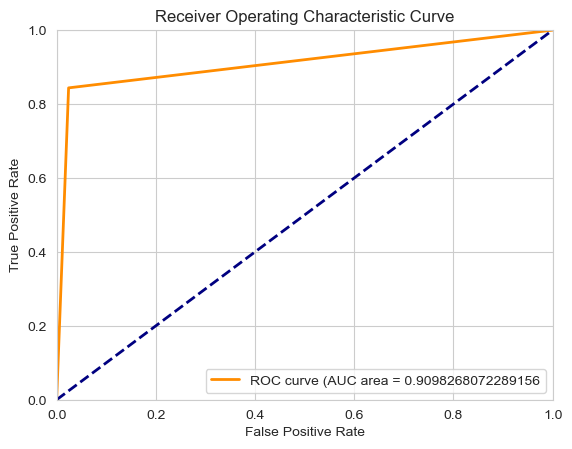

In [25]:
from sklearn.metrics import roc_curve, auc
# Actual outcomes and predicted probabilities # Calculate ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
# Calculate AUC
roc_auc=auc (fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= "lower right")

###

In [27]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifiers={
'Logistic Regression' : LogisticRegression(max_iter=500,solver='newton-cg',random_state=42),
'Decision Tree' : DecisionTreeClassifier(),
'Random Forest' : RandomForestClassifier(),
'Support Vector Machine' : SVC(kernel='linear',),
}
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = {}
for name, clf in classifiers.items():
  rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
  rfecv.fit(X_train_resampled, y_train_resampled)
  X_train_rfecv = rfecv.transform(X_train_resampled)
  X_test_rfecv = rfecv.transform(X_test)
  clf.fit(X_train_rfecv, y_train_resampled)
  y_pred = clf.predict(X_test_rfecv)
  cm = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix for {name}:\n", cm)
  accuracy = accuracy_score(y_test, y_pred)
  result[name] = accuracy
  print(f'{name} Accuracy: {accuracy * 100:.2f}%')
  print(classification_report(y_test, y_pred, zero_division=0))
for i in result:
  print(i,result[i]*100)

Confusion Matrix for Logistic Regression:
 [[77  6]
 [ 2 30]]
Logistic Regression Accuracy: 93.04%
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        83
           1       0.83      0.94      0.88        32

    accuracy                           0.93       115
   macro avg       0.90      0.93      0.92       115
weighted avg       0.94      0.93      0.93       115

Confusion Matrix for Decision Tree:
 [[76  7]
 [ 1 31]]
Decision Tree Accuracy: 93.04%
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        83
           1       0.82      0.97      0.89        32

    accuracy                           0.93       115
   macro avg       0.90      0.94      0.92       115
weighted avg       0.94      0.93      0.93       115

Confusion Matrix for Random Forest:
 [[81  2]
 [ 1 31]]
Random Forest Accuracy: 97.39%
              precision    recall  f1-score   support

           0      

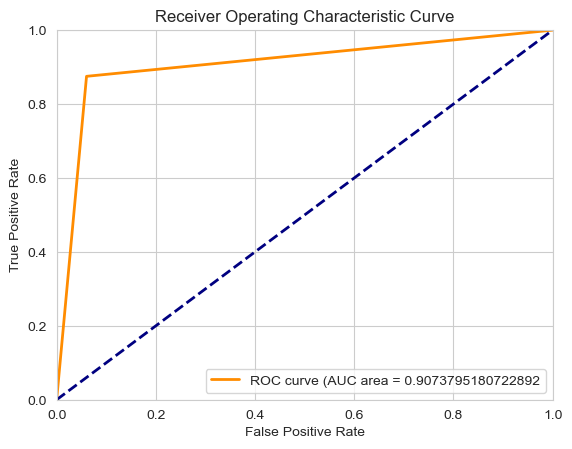

In [28]:
from sklearn.metrics import roc_curve, auc
# Actual outcomes and predicted probabilities # Calculate ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
# Calculate AUC
roc_auc=auc (fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= "lower right")

# PCA

In [30]:


pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")

# Step 3: Train and evaluate classifiers on PCA-transformed data
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='newton-cg', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
}

results = {}
for name, clf in classifiers.items():
    print(f"\n{name}")
    # Train the classifier
    clf.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_pca)
    y_prob = clf.predict_proba(X_test_pca)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluation metrics
    print(classification_report(y_test, y_pred))
    if y_prob is not None:
        print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")

    # Store results
    results[name] = {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

Original number of features: 16
Reduced number of features: 13

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        83
           1       0.87      0.84      0.86        32

    accuracy                           0.92       115
   macro avg       0.91      0.90      0.90       115
weighted avg       0.92      0.92      0.92       115

AUC-ROC: 0.9541

Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        83
           1       0.92      0.75      0.83        32

    accuracy                           0.91       115
   macro avg       0.92      0.86      0.88       115
weighted avg       0.91      0.91      0.91       115

AUC-ROC: 0.8630

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        83
           1       0.96      0.84      0.90        32

    accuracy                        

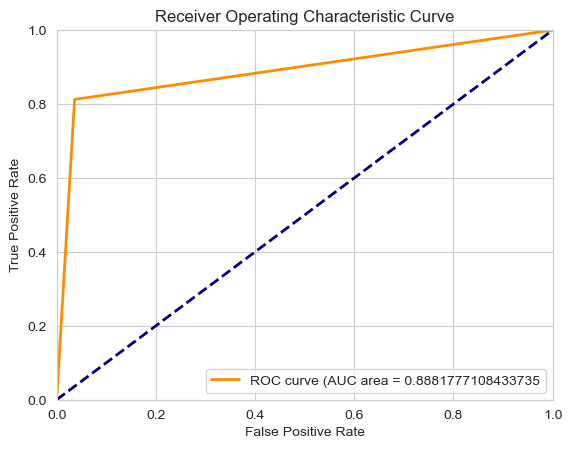

In [31]:
from sklearn.metrics import roc_curve, auc
# Actual outcomes and predicted probabilities # Calculate ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
# Calculate AUC
roc_auc=auc (fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= "lower right")